In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize

x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN needs channel dimension
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

#One-hot encoding
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes=10)

# CNN-1

cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


print("\nTraining CNN-1...")
history_cnn = cnn.fit(
    x_train_cnn, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_cnn, y_test_cat),
    verbose=1
)

cnn_acc = cnn.evaluate(x_test_cnn, y_test_cat, verbose=0)[1]
print("CNN-1 Test Accuracy:", cnn_acc)

# MLP-1

mlp1 = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(10, activation='softmax')

])

mlp1.compile(
    optimizer=SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining MLP-1...")
history_mlp1 = mlp1.fit(
    x_train, y_train_cat,
    epochs=20,
    batch_size=128,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

mlp1_acc = mlp1.evaluate(x_test, y_test_cat, verbose=0)[1]
print("MLP-1 Test Accuracy:", mlp1_acc)



Training CNN-1...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 172s 361ms/step - accuracy: 0.8968 - loss: 0.3516 - val_accuracy: 0.9843 - val_loss: 0.0498
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 175s 373ms/step - accuracy: 0.9843 - loss: 0.0511 - val_accuracy: 0.9861 - val_loss: 0.0395
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 352ms/step - accuracy: 0.9896 - loss: 0.0319 - val_accuracy: 0.9874 - val_loss: 0.0354
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 161s 343ms/step - accuracy: 0.9924 - loss: 0.0223 - val_accuracy: 0.9888 - val_loss: 0.0306
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 207s 353ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9900 - val_loss: 0.0314
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 354ms/step - accuracy: 0.9957 - loss: 0.0127 - val_accuracy: 0.9891 - val_loss: 0.0393
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 203s 355ms/step - accuracy: 0.9968 - loss: 0.0099 - val_accuracy: 0.9897 - val_loss: 0.0353
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 163s 348ms/step -

In [ ]:
# MLP-2

mlp2 = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dense(10, activation='softmax')
])

mlp2.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining MLP-2...")
history_mlp2 = mlp2.fit(
    x_train, y_train_cat,
    epochs=15,
    batch_size=128,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

mlp2_acc = mlp2.evaluate(x_test, y_test_cat, verbose=0)[1]
print("MLP-2 Test Accuracy:", mlp2_acc)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Training MLP-2...
Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8780 - loss: 0.4093 - val_accuracy: 0.9581 - val_loss: 0.1368
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9683 - loss: 0.1121 - val_accuracy: 0.9694 - val_loss: 0.0982
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9804 - loss: 0.0718 - val_accuracy: 0.9746 - val_loss: 0.0838
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9875 - loss: 0.0515 - val_accuracy: 0.9763 - val_loss: 0.0789
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9906 - loss: 0.0386 - val_accuracy: 0.9758 - val_loss: 0.0775
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9924 - loss: 0.0301 - val_accuracy: 0.9732 - val_loss: 0.0822
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9941 - loss: 0.0240 - val_accuracy: 0.9765 - val_loss: 0.0744
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9954 - loss: 0.

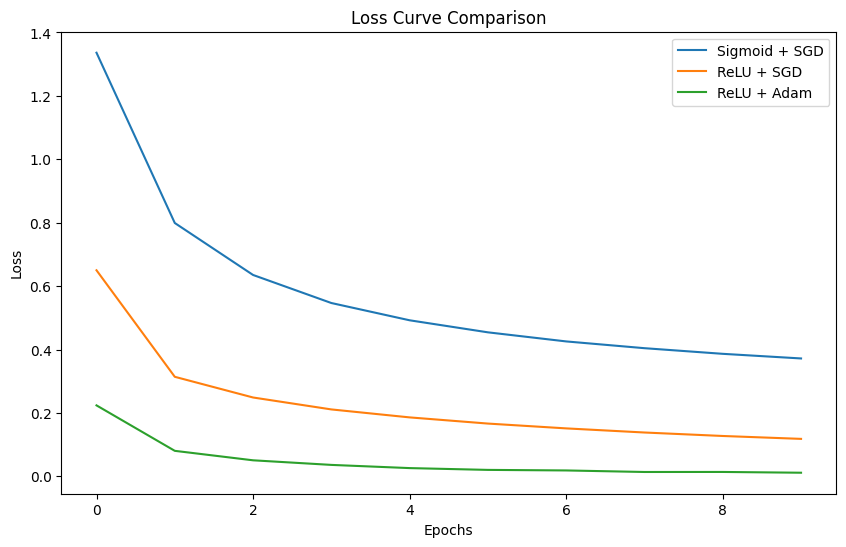

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(histories[0].history['loss'], label='Sigmoid + SGD')
plt.plot(histories[2].history['loss'], label='ReLU + SGD')
plt.plot(histories[4].history['loss'], label='ReLU + Adam')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve Comparison")
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Running: Sigmoid, sgd, BN=True, Dropout=0.0


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Running: Tanh, sgd, BN=True, Dropout=0.0

Running: ReLU, sgd, BN=True, Dropout=0.0

Running: ReLU, momentum, BN=True, Dropout=0.0

Running: ReLU, adam, BN=True, Dropout=0.0

Running: ReLU, adam, BN=False, Dropout=0.0

Running: ReLU, adam, BN=False, Dropout=0.1

Running: ReLU, adam, BN=True, Dropout=0.25

=== COMPARISON TABLE ===
  Activation Optimizer  Epochs  BatchNorm  Dropout  Final Accuracy
0    Sigmoid       sgd      10       True     0.00          0.9129
1       Tanh       sgd      10       True     0.00          0.9447
2       ReLU       sgd      10       True     0.00          0.9654
3       ReLU  momentum      10       True     0.00          0.9818
4       ReLU      adam      10       True     0.00          0.9814
5       ReLU      adam      10      False     0.00          0.9821
6       ReLU      adam      10      False     0.10          0.9817
7       ReLU      adam      10       True     0.25          0.9792


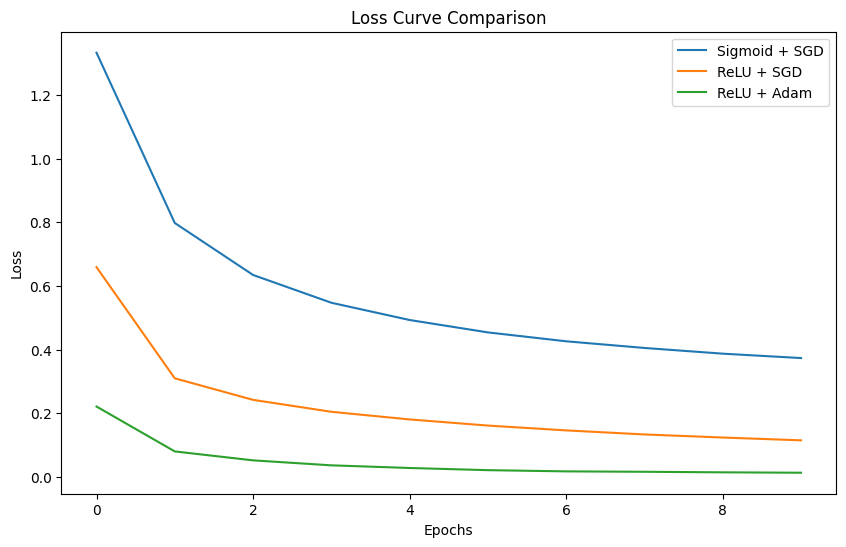

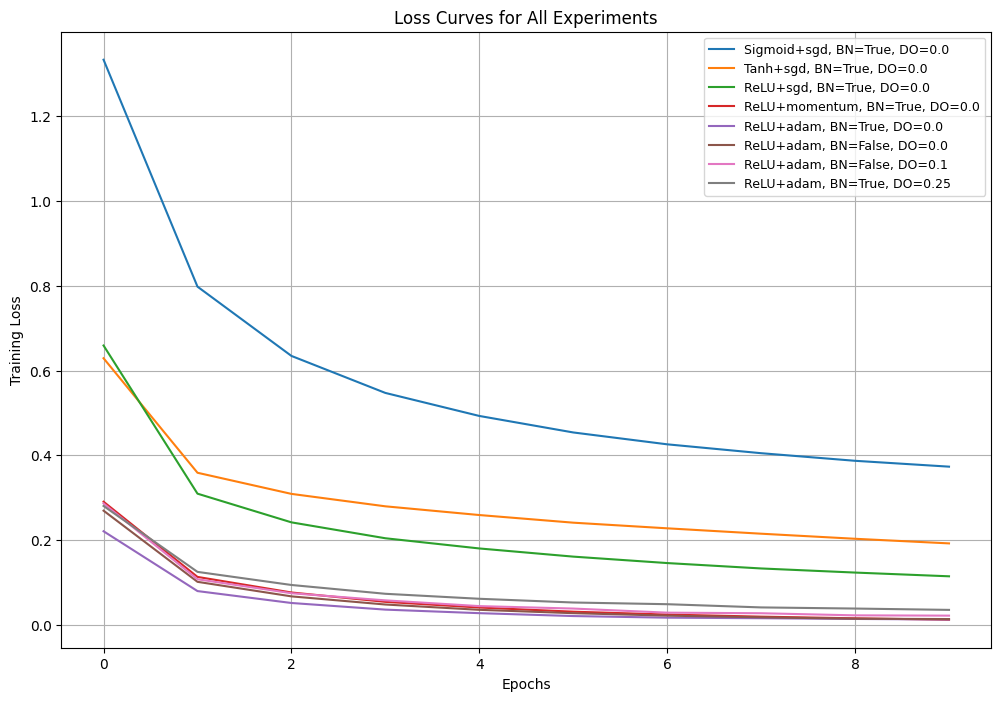

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
import pandas as pd
import matplotlib.pyplot as plt

# ======================
# Load MNIST
# ======================
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# ======================
# Model Builder
# ======================
def build_mlp(activation='relu', optimizer='sgd', bn=True, dropout=0.0):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28,28)))

    model.add(layers.Dense(256))
    if bn: model.add(layers.BatchNormalization())
    model.add(layers.Activation(activation))
    if dropout > 0: model.add(layers.Dropout(dropout))

    model.add(layers.Dense(128))
    if bn: model.add(layers.BatchNormalization())
    model.add(layers.Activation(activation))

    model.add(layers.Dense(10, activation='softmax'))

    if optimizer == 'sgd':
        opt = SGD(learning_rate=0.01)
    elif optimizer == 'momentum':
        opt = SGD(learning_rate=0.01, momentum=0.9)
    else:
        opt = Adam()

    model.compile(
        optimizer=opt,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ======================
# Experiments
# ======================
experiments = [
    ("Sigmoid", "sgd", 10, True, 0.0),
    ("Tanh", "sgd", 10, True, 0.0),
    ("ReLU", "sgd", 10, True, 0.0),
    ("ReLU", "momentum", 10, True, 0.0),
    ("ReLU", "adam", 10, True, 0.0),
    ("ReLU", "adam", 10, False, 0.0),
    ("ReLU", "adam", 10, False, 0.1),
    ("ReLU", "adam", 10, True, 0.25),
]

results = []
histories = []

for act, opt, ep, bn, dr in experiments:
    print(f"\nRunning: {act}, {opt}, BN={bn}, Dropout={dr}")
    model = build_mlp(
        activation=act.lower(),
        optimizer=opt,
        bn=bn,
        dropout=dr
    )
    history = model.fit(
        x_train, y_train,
        epochs=ep,
        batch_size=128,
        validation_data=(x_test, y_test),
        verbose=0
    )
    acc = model.evaluate(x_test, y_test, verbose=0)[1]
    results.append([act, opt, ep, bn, dr, acc])
    histories.append(history)

# ======================
# Results Table
# ======================
df = pd.DataFrame(
    results,
    columns=["Activation", "Optimizer", "Epochs", "BatchNorm", "Dropout", "Final Accuracy"]
)

print("\n=== COMPARISON TABLE ===")
print(df)

# ======================
# Plot Loss Curves (3 experiments)
# ======================
plt.figure(figsize=(10,6))
plt.plot(histories[0].history['loss'], label='Sigmoid + SGD')
plt.plot(histories[2].history['loss'], label='ReLU + SGD')
plt.plot(histories[4].history['loss'], label='ReLU + Adam')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curve Comparison")
plt.show()

plt.figure(figsize=(12, 8))

for i, history in enumerate(histories):
    act, opt, ep, bn, dr = experiments[i]
    label = f"{act}+{opt}, BN={bn}, DO={dr}"
    plt.plot(history.history['loss'], label=label)

plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Loss Curves for All Experiments")
plt.legend(fontsize=9)
plt.grid(True)
plt.show()

